# LetsGrowMore VIP January 2022

# Data Science Internship

# Prajwal Bhandwalkar

 ## Task 2 - Prediction Using Decision Tree Algorithm (Level - Intermediate)

In [ ]:
#Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import random
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [5]:
#Loading data

file_path = r"C:\Users\prajw\OneDrive\Desktop\Let's Grow More\iris.csv"
dataset = pd.read_csv(file_path, index_col = "Id")

In [7]:
#Shape of dataset

dataset.shape

(150, 5)

In [9]:
#Columns in dataset

dataset.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
# How many number of unique species?

dataset["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Now we find what is the frequency of each unique species in dataset i.e. how many times each species occurs in the dataset

In [13]:
print("Frequency of Iris-virginica, Iris-versicolor and Iris-setosa are as follows, \n")
print(dataset["Species"].value_counts())

Frequency of Iris-virginica, Iris-versicolor and Iris-setosa are as follows, 

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64


In [ ]:
# There are total 150 datapoints and 50 values for each species. So the dataset is called balanced dataset as there is equal number of features for each species.

### Scatter Plot

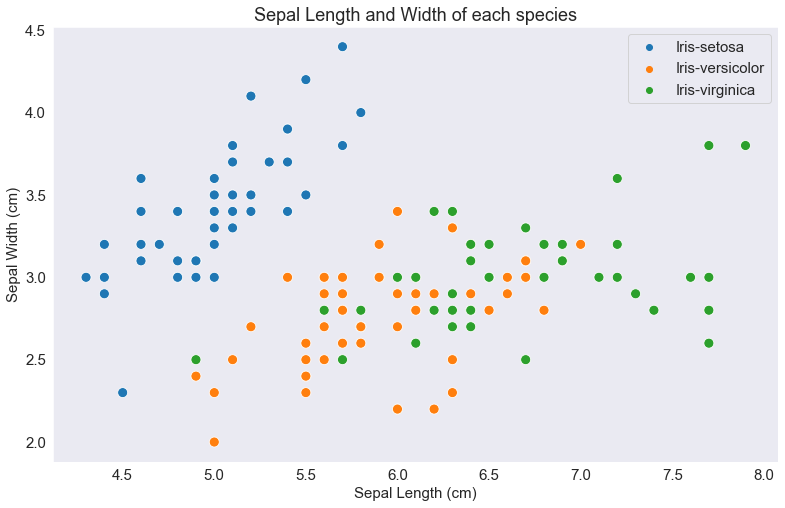

In [69]:
plt.figure(figsize = (13, 8))
plt.rcParams.update({'font.size': 15})
plt.title("Sepal Length and Width of each species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
sns.scatterplot(x = dataset["SepalLengthCm"], y = dataset["SepalWidthCm"], hue = dataset["Species"], s = 100)
plt.grid()
plt.legend()
plt.show()

In [ ]:
#Observation - It is clearly seen that Setosa species can be classified from other species by drawing a straight line. And Versicolor and Virginica species cannot be classified by drawing a straight line.

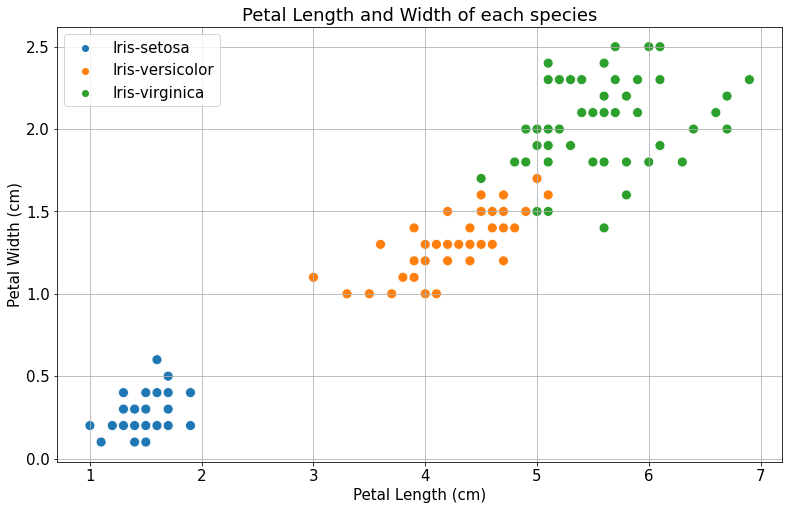

In [17]:
plt.figure(figsize = (13, 8))
plt.rcParams.update({'font.size': 15})
plt.title("Petal Length and Width of each species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
sns.scatterplot(x = dataset["PetalLengthCm"], y = dataset["PetalWidthCm"], hue = dataset["Species"], s = 100)
plt.grid()
plt.legend()
plt.show()


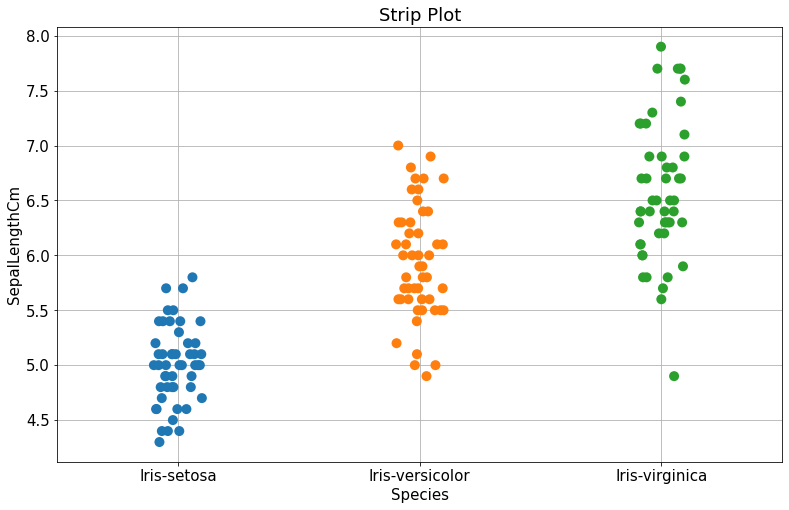

In [19]:
plt.figure(figsize = (13, 8))
plt.title('Strip Plot')
plt.ylabel("Sepal Length in cm")
plt.rcParams.update({'font.size': 15})
ax = sns.stripplot(x='Species', y='SepalLengthCm', data=dataset, s = 10)
plt.grid()

D:\Coding\Python\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


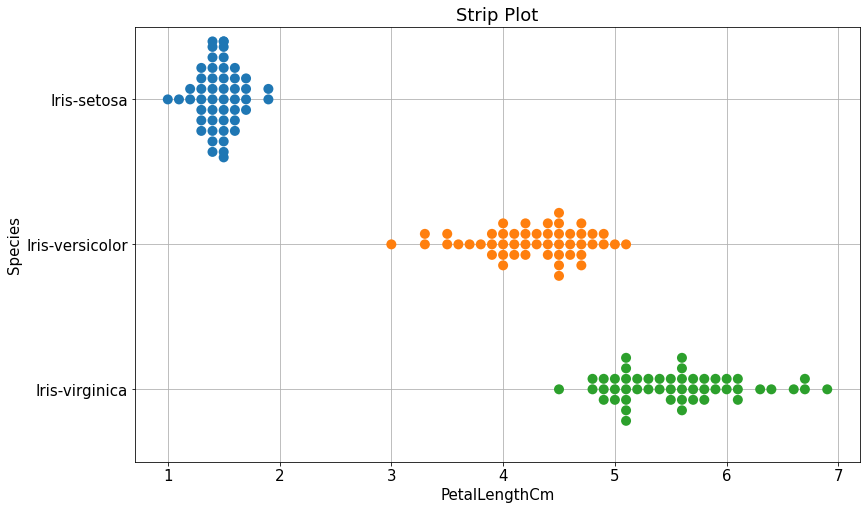

In [21]:
plt.figure(figsize = (13, 8))
plt.title('Strip Plot')
plt.xlabel("Petal Length in cm")
plt.rcParams.update({'font.size': 15})
ax = sns.swarmplot(x='PetalLengthCm', y='Species', data=dataset, s = 10)
plt.grid()


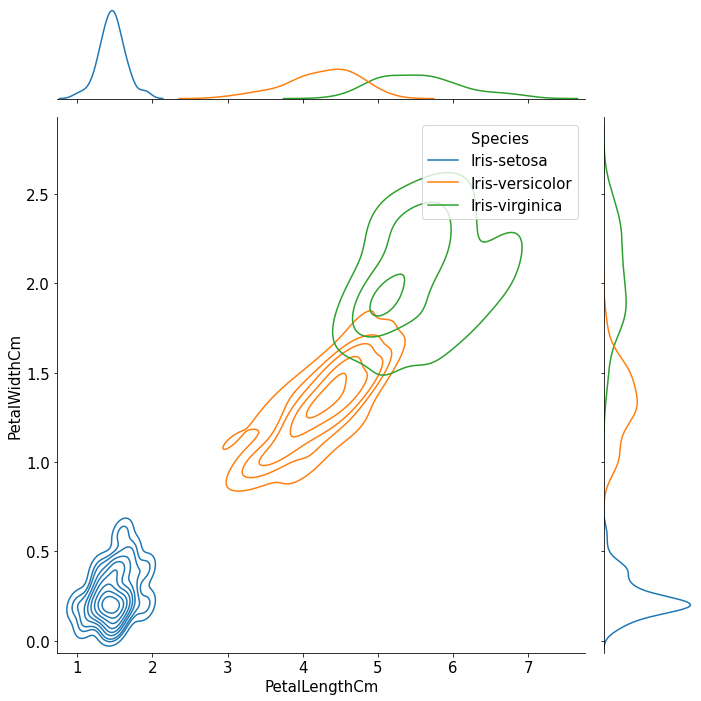

In [23]:
sns.jointplot(data=dataset, x="PetalLengthCm", y="PetalWidthCm", hue="Species", height = 10, kind = "kde")

# Pair Plots

<Figure size 504x504 with 0 Axes>

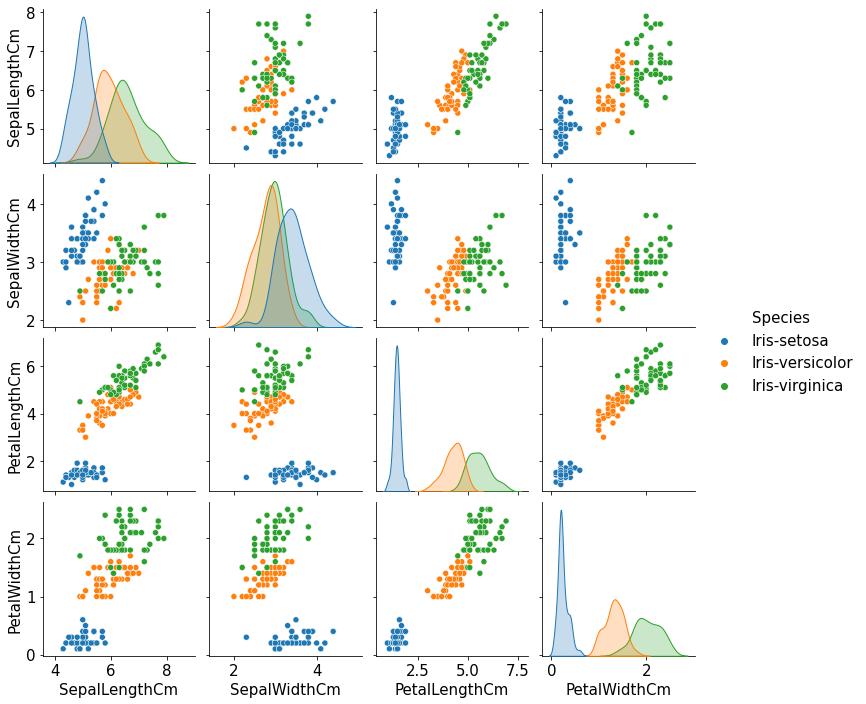

In [25]:
plt.figure(figsize = (7, 7))
plt.rcParams.update({'font.size': 15})
sns.pairplot(dataset, hue = "Species")
plt.grid()
plt.show()

D:\Coding\Python\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Coding\Python\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Coding\Python\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

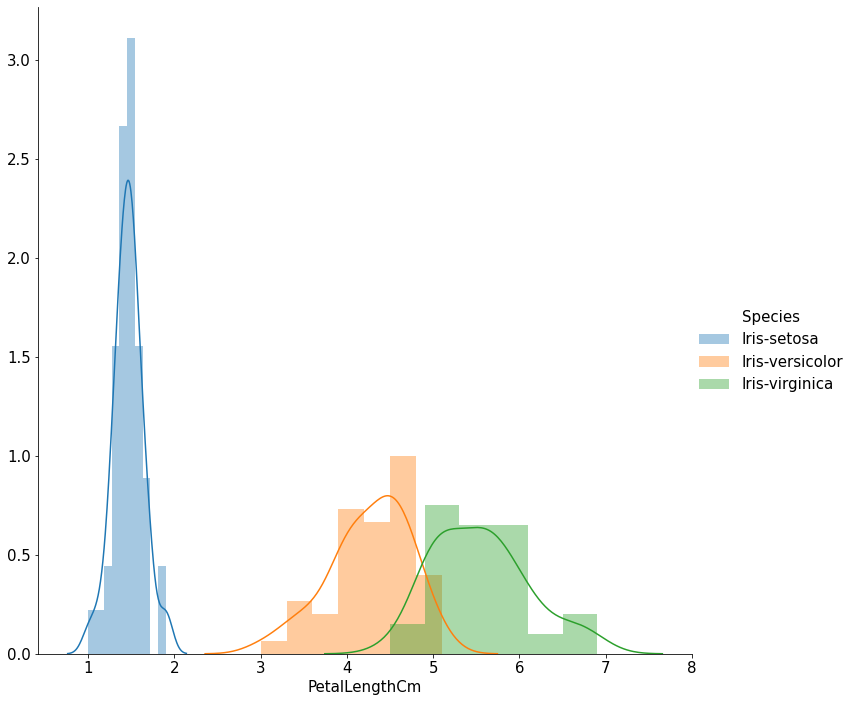

In [27]:
sns.FacetGrid(dataset, hue = "Species", height = 10).map(sns.distplot, "PetalLengthCm").add_legend()
plt.show()

# Summary statistics of data

In [29]:
dataset.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 11.1+ KB


In [33]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
dataset.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


# Feature Engineering

In [37]:
"""

  Adding two more columns 

  PetalToSepalLengthRatio = Petal length / Sepal Length
  PetalToSepalWidthRatio = Petal Width / Sepal Width
  
"""
dataset["PetalToSepalLengthRatio"]= dataset["PetalLengthCm"]/dataset["SepalLengthCm"]
dataset["PetalToSepalWidthRatio"] = dataset["PetalWidthCm"]/dataset["SepalWidthCm"]
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalToSepalLengthRatio,PetalToSepalWidthRatio
Id,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0.274510,0.057143
2,4.9,3.0,1.4,0.2,Iris-setosa,0.285714,0.066667
3,4.7,3.2,1.3,0.2,Iris-setosa,0.276596,0.062500
4,4.6,3.1,1.5,0.2,Iris-setosa,0.326087,0.064516
5,5.0,3.6,1.4,0.2,Iris-setosa,0.280000,0.055556


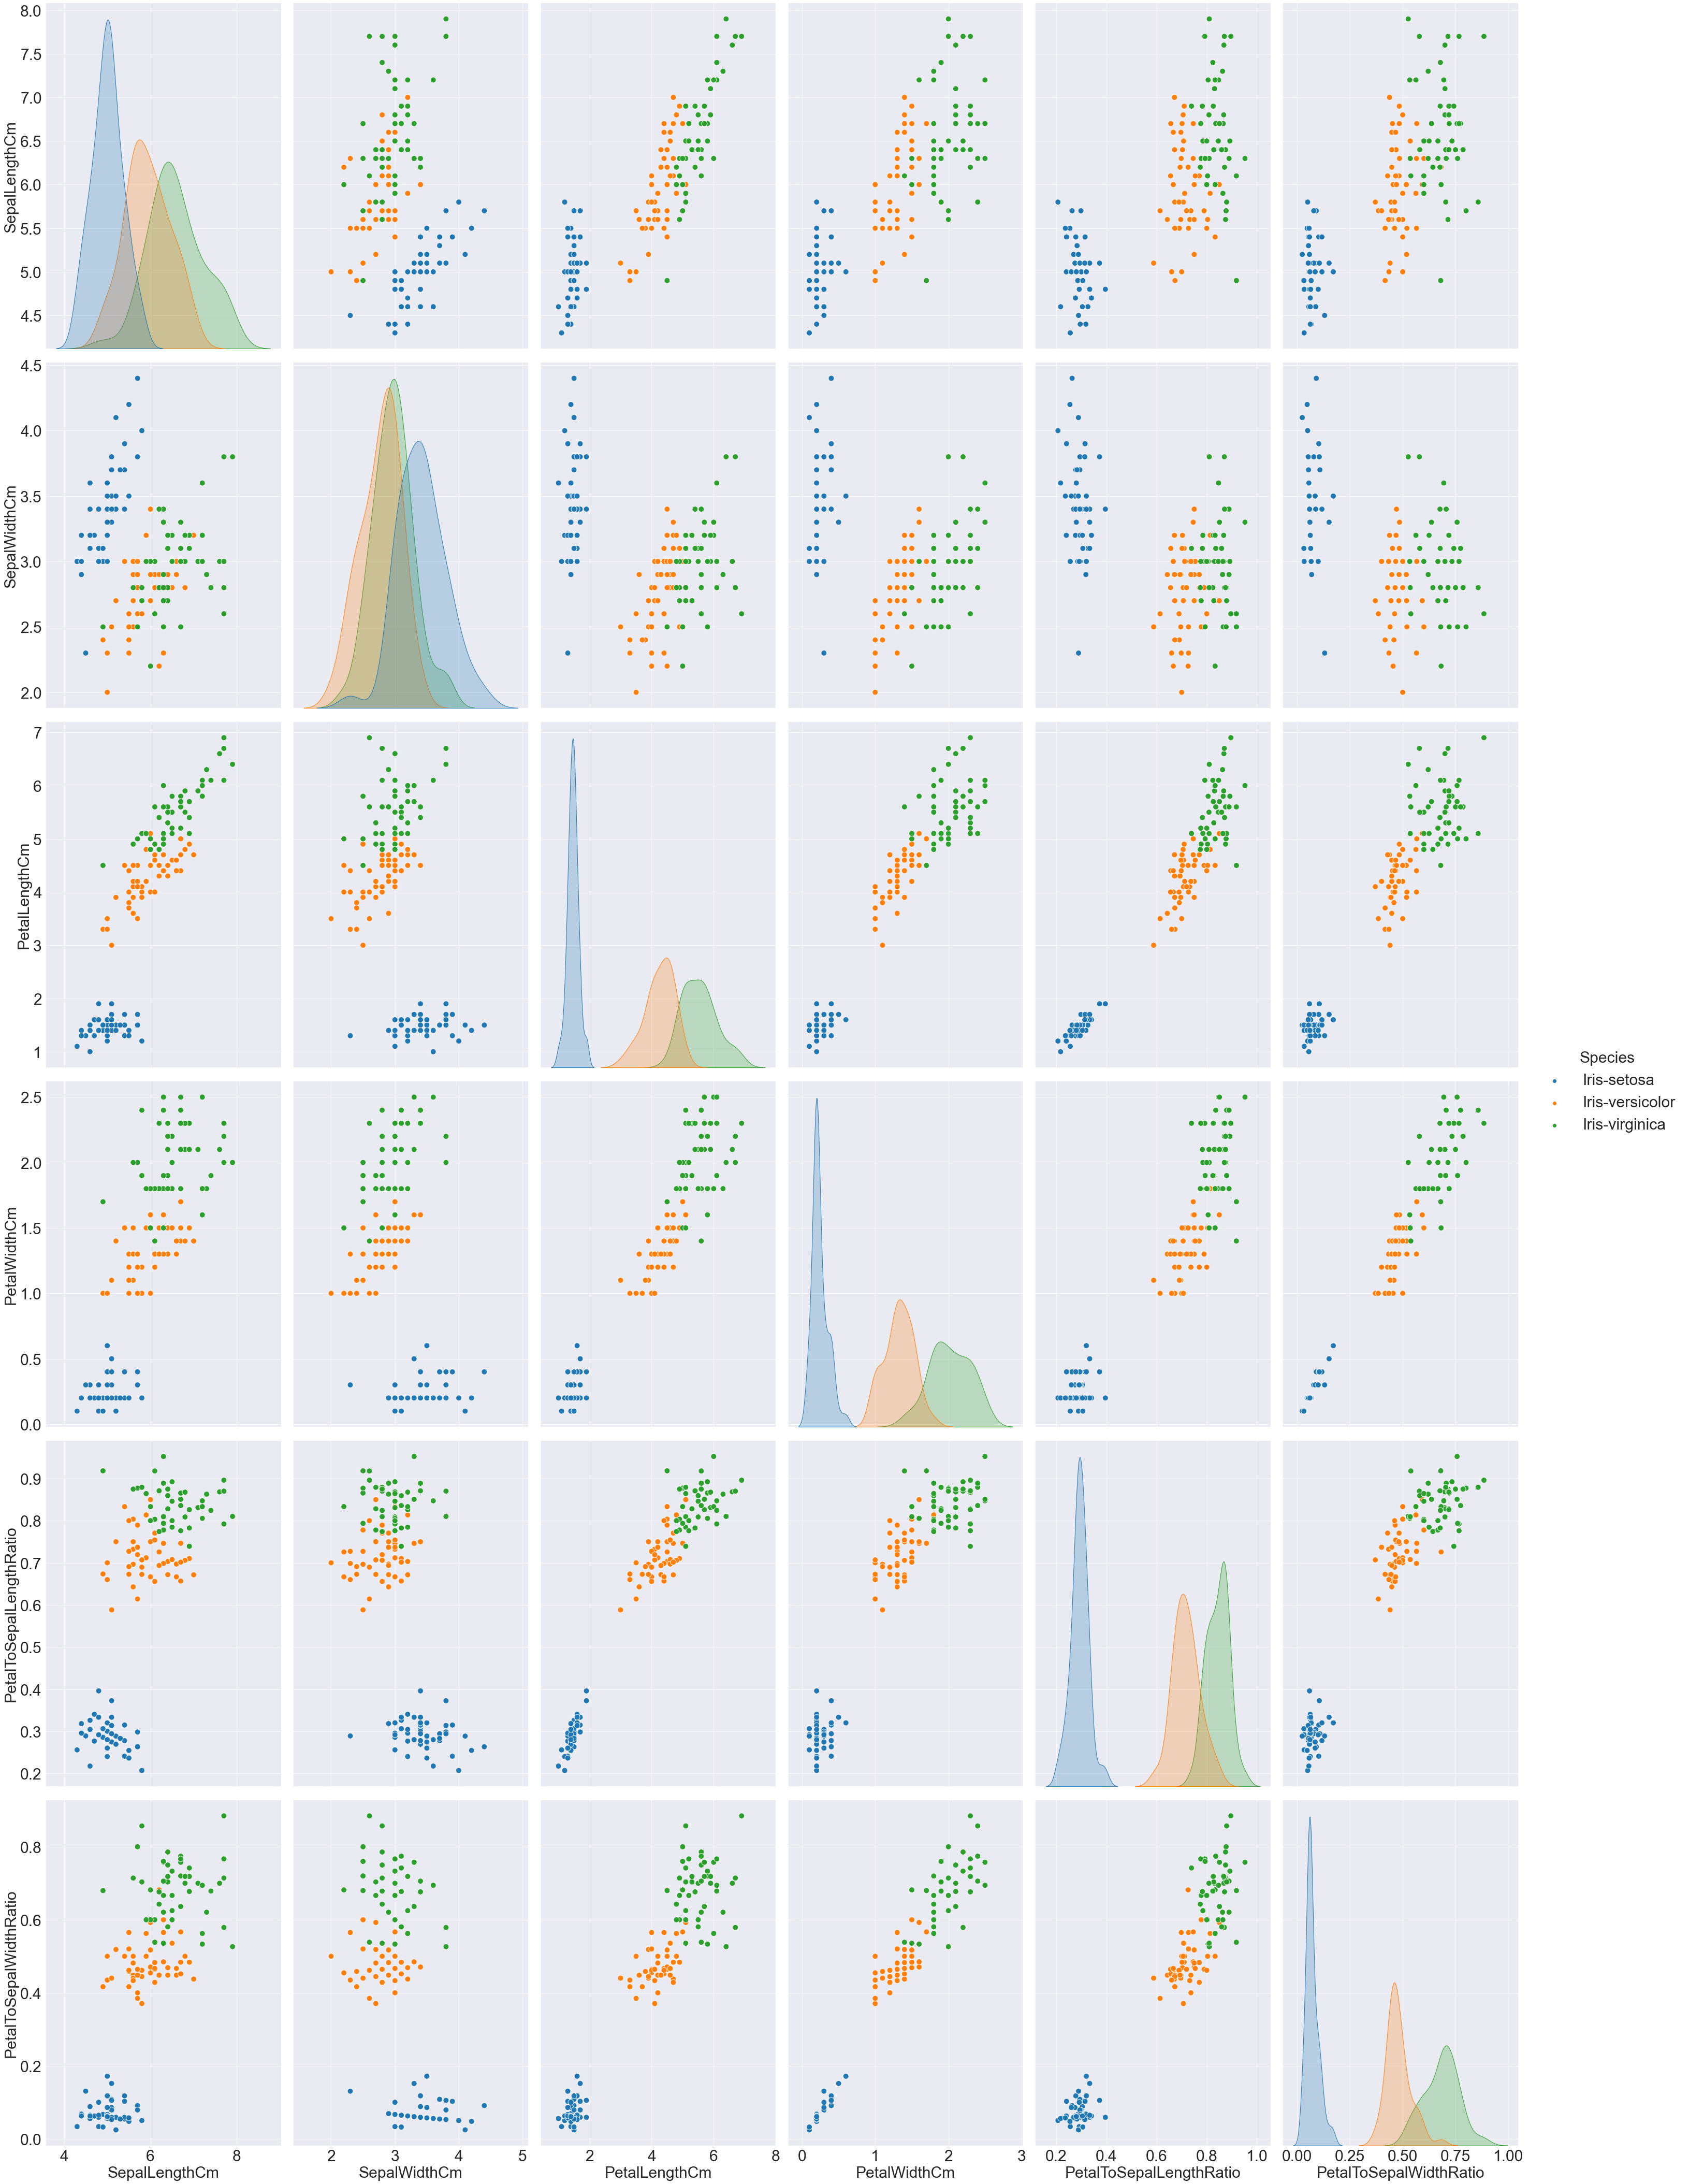

In [39]:
sns.set_style(style="darkgrid")
plt.rcParams.update({'font.size': 30})
sns.pairplot(dataset, hue = "Species", height=10, aspect = 0.7, plot_kws={"s": 120})


# Building Decision Tree classification model
### Shuffling the dataset

In [41]:
dataset = dataset.sample(frac =1)

In [43]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalToSepalLengthRatio,PetalToSepalWidthRatio
Id,,,,,,,
46,4.8,3.0,1.4,0.3,Iris-setosa,0.291667,0.100000
9,4.4,2.9,1.4,0.2,Iris-setosa,0.318182,0.068966
88,6.3,2.3,4.4,1.3,Iris-versicolor,0.698413,0.565217
125,6.7,3.3,5.7,2.1,Iris-virginica,0.850746,0.636364
131,7.4,2.8,6.1,1.9,Iris-virginica,0.824324,0.678571


In [45]:
column_feature_names = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "PetalToSepalLengthRatio", "PetalToSepalLengthRatio"]

features = dataset[column_feature_names]

column_label_name = ["Species"]

labels = dataset[column_label_name]

In [47]:
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,PetalToSepalLengthRatio,PetalToSepalLengthRatio
Id,,,,,,
46,4.8,3.0,1.4,0.3,0.291667,0.291667
9,4.4,2.9,1.4,0.2,0.318182,0.318182
88,6.3,2.3,4.4,1.3,0.698413,0.698413
125,6.7,3.3,5.7,2.1,0.850746,0.850746
131,7.4,2.8,6.1,1.9,0.824324,0.824324


In [49]:
labels.head()

,Species
Id,
46,Iris-setosa
9,Iris-setosa
88,Iris-versicolor
125,Iris-virginica
131,Iris-virginica


In [ ]:
#Converting string values to numerical values

In [51]:
labelencoder = LabelEncoder()
labels = labelencoder.fit_transform(labels)
print(labels)

[0 0 1 2 2 1 0 1 1 2 2 2 1 2 0 2 1 0 0 1 2 2 1 0 2 0 0 1 1 1 1 2 2 0 0 2 0
 0 0 2 2 2 2 2 0 1 1 0 1 0 2 0 2 1 1 2 0 1 2 0 2 2 0 2 2 1 0 1 2 0 0 2 1 0
 2 0 0 2 1 0 2 0 0 1 0 1 1 0 1 2 2 1 1 0 1 2 1 0 1 1 0 0 2 2 0 2 1 1 0 1 1
 0 1 2 2 1 2 0 1 1 2 1 1 1 2 0 2 0 0 0 2 1 0 0 0 2 0 1 2 1 2 0 1 0 2 1 1 1
 2 2]


In [ ]:
#Splitting data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20)
print(len(X_train))
print(len(X_test))

### Creating decision tree classifier and train it on training data

In [55]:
dtc = DecisionTreeClassifier()

In [57]:
model = dtc.fit(X_train, y_train)

In [59]:
y_pred = dtc.predict(X_test)

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


### Confusion matrix

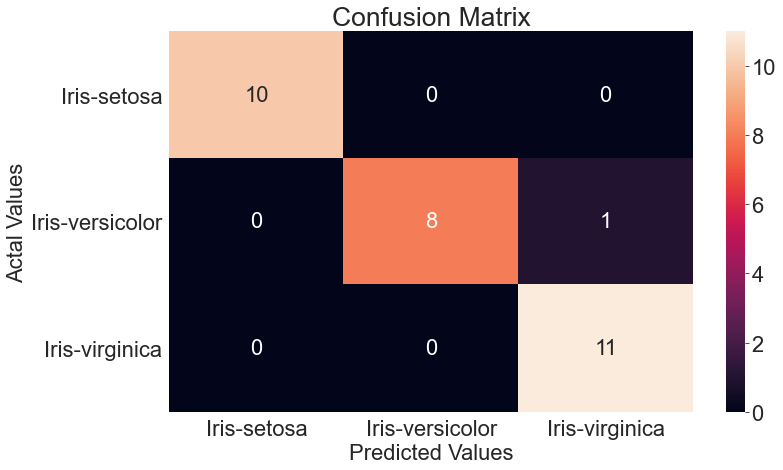

In [63]:
cm = confusion_matrix(y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"], 
                     columns = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

#Plotting the confusion matrix
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12,7))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

In [65]:
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- feature_4 <= 0.84
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_4 >  0.84
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [67]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

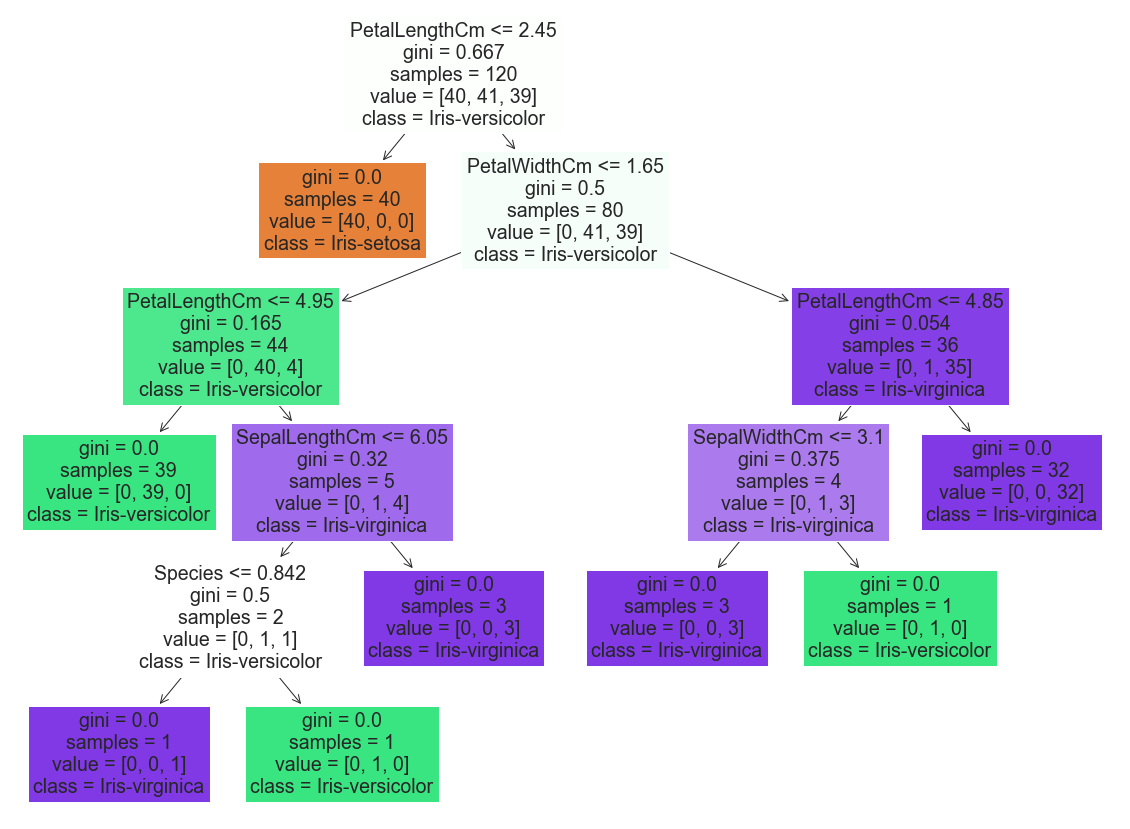

In [70]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(dtc, 
                   feature_names=list(dataset.columns),  
                   class_names=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
                   filled=True)

In [72]:
fig.savefig("decistion_tree_png.png")

# Thank You!
